## Pomiar i preprocessing sygnału EMG
Procedura analizy sygnału EMG: celem jest dokonanie pomiaru sygnału elektrycznego aktywności mięśni szkieletowych (biceps) - elektromiografia EMG, oraz analizy sygnału - określenie magnitudy aktywacji mięśnia, widma sygnału EMG, stopnia zmęczenia.

#### 1. Rozmieszczenie elektrod do pomiaru sygnału EMG 
 - użyj system pomiarowy jak do pomiaru EKG;
 - dwie elektrody pomiarowe powinny znajdować się pomiędzy strefą unerwienia a przyczepem ścięgna mięśnia, wzdłuż środkowej linii podłużnej mięśnia. Powinny być oddalone od siebie o 2–4 cm i umieszczone nad brzuchem mięśnia, aby ograniczyć zakłócenia pochodzące od innych mięśni. Elektroda odniesienia powinna znajdować się na części ciała pokrytej kością, charakteryzującej się bardzo małą aktywnością mięśniową;
 - biała elektroda powinna znajdować się w środkowej części brzucha mięśnia;
 - czarna elektroda jest elektrodą odniesienia (nadgarstek)

#### 2. Procedura pomiaru sygnału EMG 
a) Eksperyment 1: określenie magnitudy aktywacji mięśnia - Maximum Voluntary Contraction (MVC)
 - chwyć stół ręką, utrzymując ramię w pozycji pionowej i łokieć pod kątem 90 stopni. Podnieś stół z całej siły przez około 5 sekund. Staraj się nie zwiększać siły stopniowo, ale maksymalnie napnij mięśnie w ciągu jednej sekundy. Staraj się jak najmniej poruszać kablami (np. nie ocieraj ramienia o bok ciała);
 - zrób co najmniej 60-sekundową przerwę i powtórz tę samą procedurę dwa razy, aby uzyskać trzy oddzielne zestawy danych MVC;

b) Eksperyment 2: określenie stopnia aktywacji mięśnia - Relative Muscle Acivation
 - spróbuj znaleźć w domu 3 ciężarki, które po podniesieniu wyraźnie różnią się od siebie. Najlepiej, żeby te ciężarki miały około 25%, 50% i 75% siły, którą wygenerowałeś izometrycznie w eksperymencie 1;
 - dokonaj rejestracji sygnału dla 3 różnych obciążeń w 3 różnych plikach

c) Eksperyment 3: określenie stopnia zmęczenia mięśnia 
 - zmierz aktywność mięśnia dwugłowego ramienia podczas maksymalnego skurczu (tak mocno, jak to możliwe!) przez pełne 10 sekund (pełne 10 sekund!);
 - zrób co najmniej 60-sekundową przerwę. Powtórz procedurę jeszcze dwa razy, aby uzyskać trzy zestawy danych dotyczących zmęczenia;

#### 3. Import bibliotek

In [ ]:
import matplotlib.pyplot as plt
import emg_lib as el
import emg_functions as ef
import numpy as np
import scipy as sp

#### 4. Wczytanie danych pomiarowych z pliku

In [ ]:
#połączenie po 3 plików odpowiednio MVC#, Weight#, Fatigue#
weights, mvc, fatigue = ef.import_data(',')

In [21]:
print(mvc.emg)

0        318
1        319
2        318
3        319
4        319
        ... 
37309    312
37310    312
37311    312
37312    312
37313    311
Name: emg, Length: 37314, dtype: int64


In [23]:
print(mvc.t)

0          719
1          720
2          721
3          722
4          723
         ...  
37309    38182
37310    38183
37311    38184
37312    38186
37313    38187
Name: t, Length: 37314, dtype: int64


#### 5. Wizualizacja wyników pomiarów

Text(0.5, 0, 't / s')

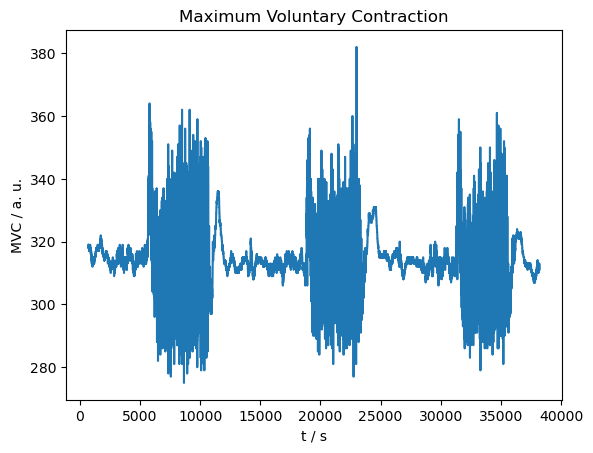

In [32]:
#MVC
plt.plot(mvc.t, mvc.emg)
plt.title('Maximum Voluntary Contraction')
plt.ylabel('MVC / a. u.')
plt.xlabel('t / s')

Text(0.5, 0, 't / s')

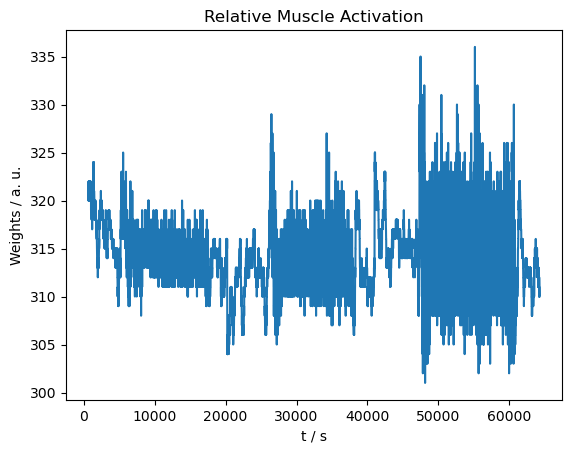

In [38]:
#Weights
plt.plot(weights.t, weights.emg)
plt.title('Relative Muscle Activation')
plt.ylabel('Weights / a. u.')
plt.xlabel('t / s')

Text(0.5, 0, 't / s')

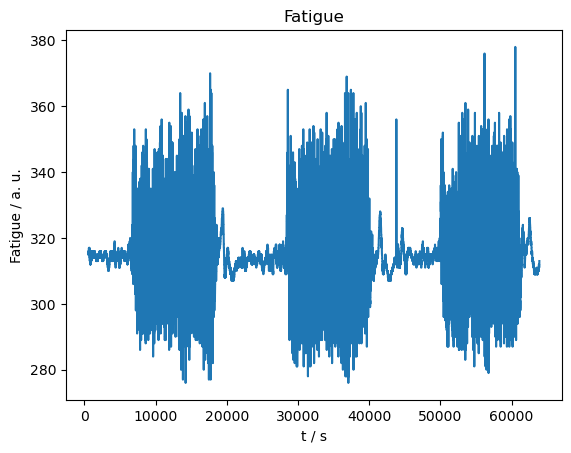

In [40]:
#Fatigue
plt.plot(fatigue.t, fatigue.emg)
plt.title('Fatigue')
plt.ylabel('Fatigue / a. u.')
plt.xlabel('t / s')

#### 6. Usunięcie offsetu

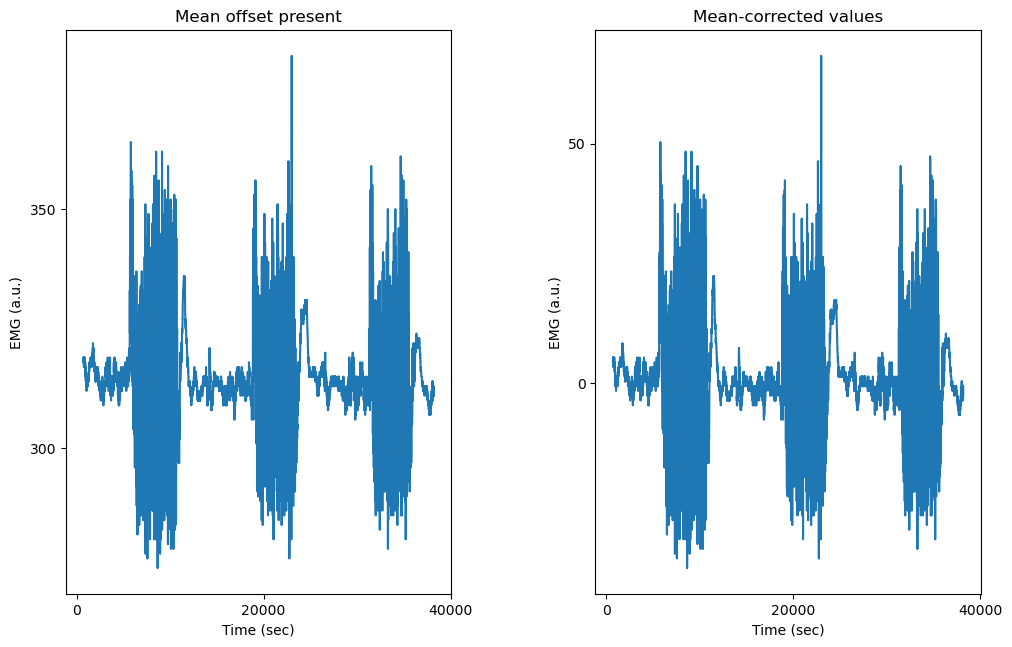

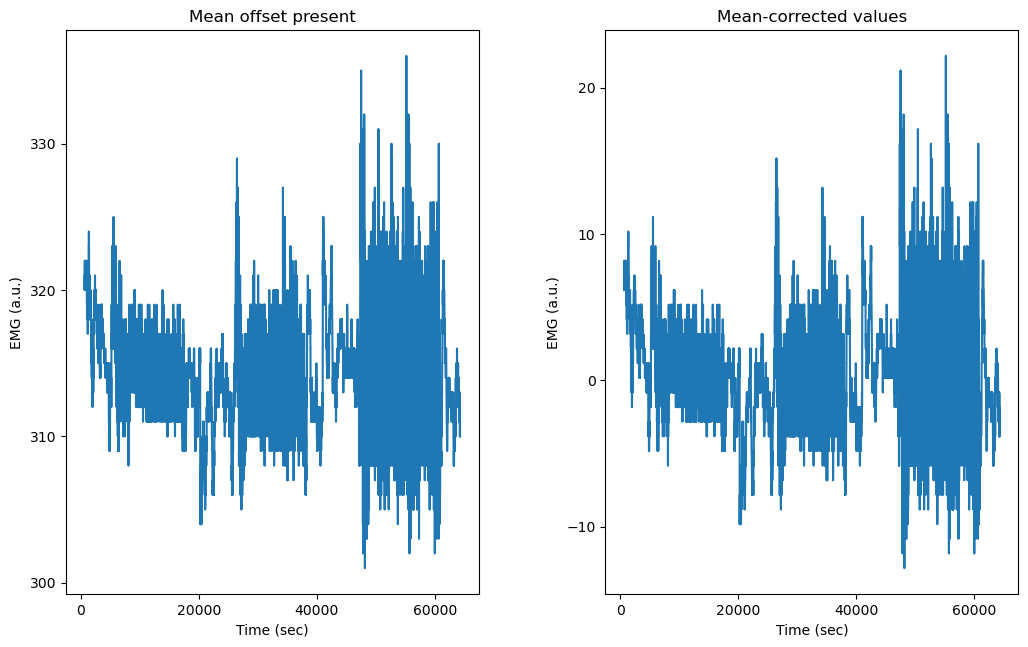

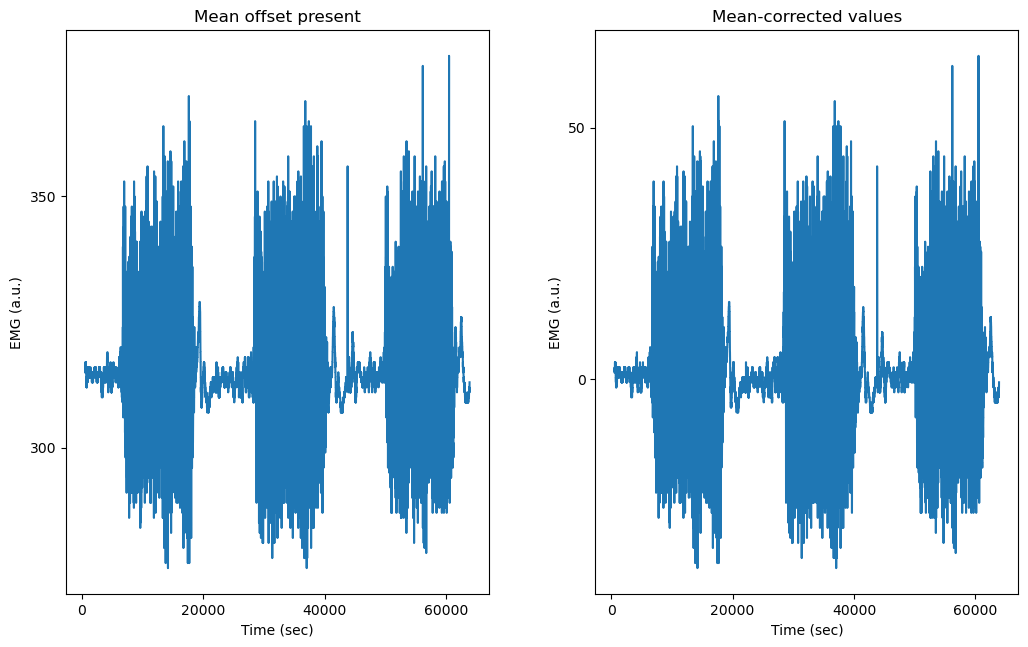

In [48]:
mvc_correctmean = ef.remove_mean(mvc.t, mvc.emg)
weights_correctmean = ef.remove_mean(weights.t, weights.emg)
fatigue_correctmean = ef.remove_mean(fatigue.t, fatigue.emg)

#### 7. Filtracja + usuwanie wartosci ujemnych + obwiednia z wszystkich sygnałów

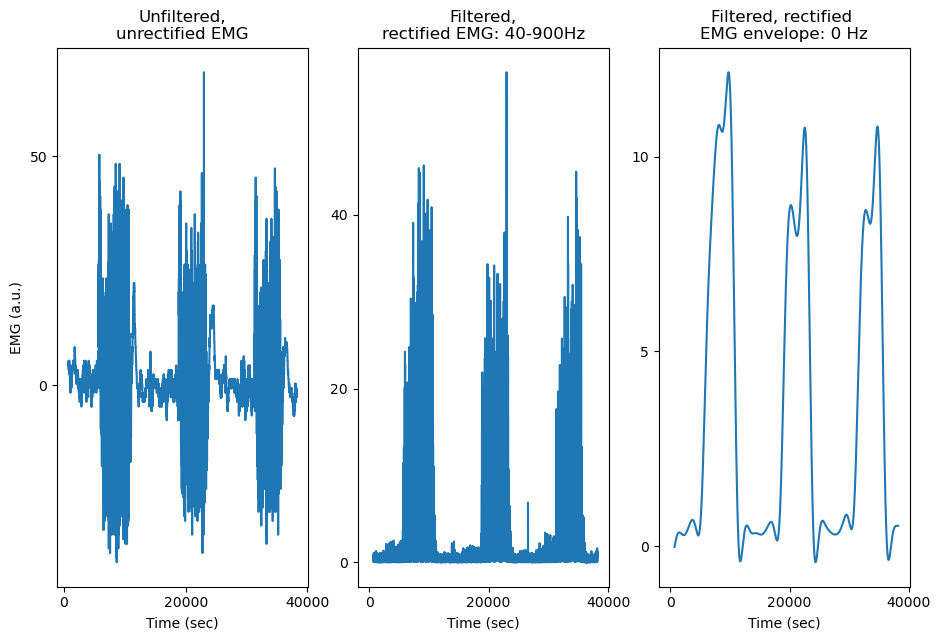

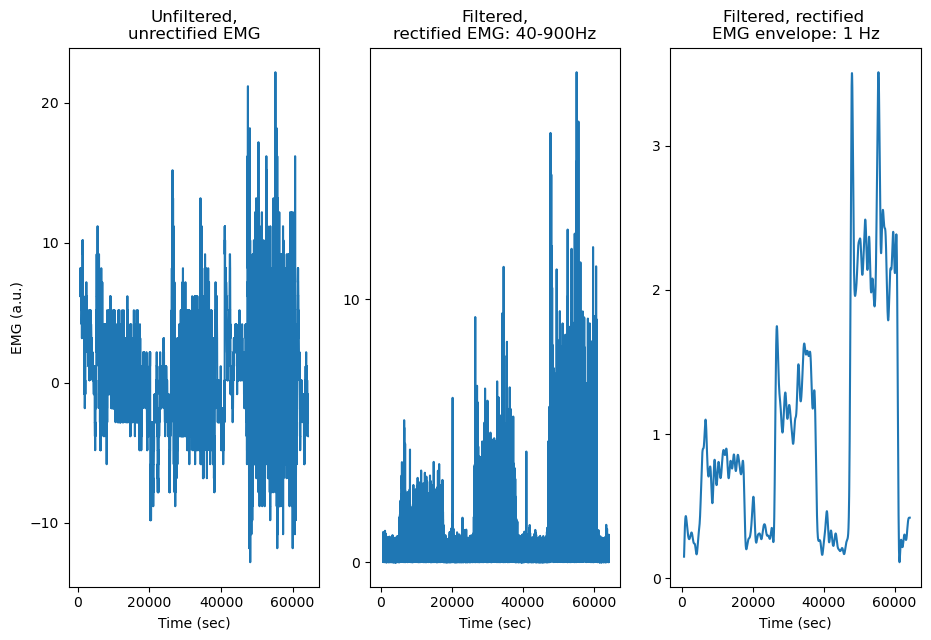

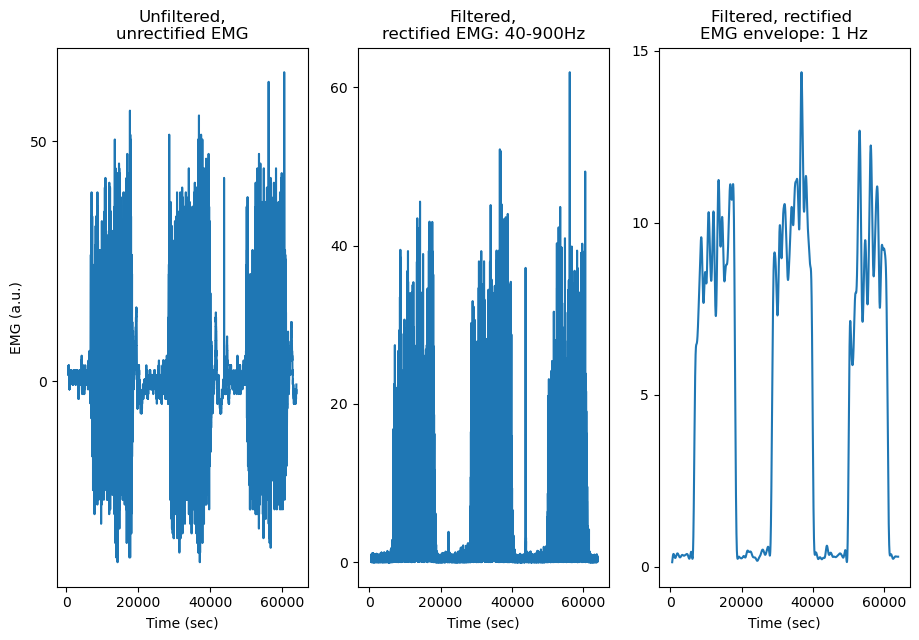

In [51]:
mvc_filt, mvc_env = ef.filteremg(mvc.t, mvc_correctmean, 0.5, 1000, 20, 450)
weights_filt, weights_env = ef.filteremg(weights.t, weights_correctmean, 1, 1000, 20, 450)
fatigue_filt, fatigue_env = ef.filteremg(fatigue.t, fatigue_correctmean, 1, 1000, 20, 450)